<a href="https://colab.research.google.com/github/krit0885824924/Project-BeeAi/blob/main/ProjectBee(successful).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
import tensorflow as tf

In [43]:
import os

In [44]:
import numpy as np
import pandas as pd

In [45]:
from tqdm import tqdm

In [46]:
!dir

240665862_536278427583183_8669753848674047343_n.jpg  P11182-31r.jpg
bee.h5						     pollen_data.csv
bee_model.h5					     PollenDataset
dataset.pkl					     Read.ipynb
images						     README.md
NP1768-10r.jpg					     Read-skimage.ipynb


In [47]:
from google.colab import drive
drive.mount("/content/drive/")
os.chdir("/content/drive/MyDrive/projectbee")

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [48]:
df = pd.read_csv('pollen_data.csv')
df

,Unnamed: 0,filename,pollen_carrying
0,0,P10057-125r.jpg,1
1,1,P57380-120r.jpg,1
2,2,NP63671-221r.jpg,0
3,3,NP53776-47r.jpg,0
4,4,NP13382-201r.jpg,0
...,...,...,...
709,709,NP64239-233r.jpg,0
710,710,NP10304-132r.jpg,0
711,711,NP28671-238r.jpg,0
712,712,P14163-218r.jpg,1


In [49]:
df['pollen_carrying'].value_counts()

1    369
0    345
Name: pollen_carrying, dtype: int64

In [50]:
import random 

In [51]:
random.seed(69420)

In [52]:
df['subset'] = random.choices([0,1,2],[0.8,0.1,0.1],k = len(df))
df

,Unnamed: 0,filename,pollen_carrying,subset
0,0,P10057-125r.jpg,1,0
1,1,P57380-120r.jpg,1,0
2,2,NP63671-221r.jpg,0,0
3,3,NP53776-47r.jpg,0,1
4,4,NP13382-201r.jpg,0,0
...,...,...,...,...
709,709,NP64239-233r.jpg,0,0
710,710,NP10304-132r.jpg,0,0
711,711,NP28671-238r.jpg,0,0
712,712,P14163-218r.jpg,1,2


In [53]:
import cv2

In [54]:
x = []
y = []
for i,a in tqdm(df.iterrows()):
    x.append(cv2.resize(cv2.imread('images/'+a.filename),(64,64))/255)
df['x'] = x

714it [00:03, 184.76it/s]


In [55]:
df

,Unnamed: 0,filename,pollen_carrying,subset,x
0,0,P10057-125r.jpg,1,0,"[[[0.6549019607843137, 0.5215686274509804, 0.2..."
1,1,P57380-120r.jpg,1,0,"[[[0.6039215686274509, 0.47058823529411764, 0...."
2,2,NP63671-221r.jpg,0,0,"[[[0.596078431372549, 0.4549019607843137, 0.21..."
3,3,NP53776-47r.jpg,0,1,"[[[0.5568627450980392, 0.43137254901960786, 0...."
4,4,NP13382-201r.jpg,0,0,"[[[0.5058823529411764, 0.4, 0.1764705882352941..."
...,...,...,...,...,...
709,709,NP64239-233r.jpg,0,0,"[[[0.5490196078431373, 0.43529411764705883, 0...."
710,710,NP10304-132r.jpg,0,0,"[[[0.6313725490196078, 0.5176470588235295, 0.2..."
711,711,NP28671-238r.jpg,0,0,"[[[0.4745098039215686, 0.34509803921568627, 0...."
712,712,P14163-218r.jpg,1,2,"[[[0.6274509803921569, 0.4980392156862745, 0.2..."


In [56]:
def gene(df,batch):
    while 1:
        x = []
        y = []
        sub = df.groupby('pollen_carrying').sample(int(batch/2))
        for i,a in sub.iterrows():
            x.append(a.x)
            y.append(a.pollen_carrying)
        yield np.array(x),np.array(y) 

In [57]:
x,y = next(gene(df,18))

In [58]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [59]:
from tensorflow.keras import layers

In [60]:
inputs = layers.Input(shape=(64,64,3))
x = tf.keras.layers.Conv2D(32,(3,3),padding="same")(inputs)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Activation(tf.keras.activations.relu)(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.1)(x)
x = layers.Dense(32,activation='relu')(x)
x = layers.Dense(1,activation='sigmoid')(x)
model = tf.keras.Model(inputs=inputs, outputs=x)
model.compile(loss="binary_crossentropy", optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.0001), metrics=["accuracy"])

In [61]:
test = model.fit(gene(df[df.subset == 0],90),epochs=70
                ,validation_data=(gene(df[df.subset == 1],45))
                ,steps_per_epoch=10
                ,validation_steps=10)

Epoch 1/70
10/10 [==============================] - 7s 614ms/step - loss: 0.7946 - accuracy: 0.6500 - val_loss: 0.6539 - val_accuracy: 0.7159
Epoch 2/70
10/10 [==============================] - 6s 593ms/step - loss: 0.3326 - accuracy: 0.8556 - val_loss: 0.6461 - val_accuracy: 0.5773
Epoch 3/70
10/10 [==============================] - 6s 597ms/step - loss: 0.2177 - accuracy: 0.9111 - val_loss: 0.6247 - val_accuracy: 0.7864
Epoch 4/70
10/10 [==============================] - 6s 601ms/step - loss: 0.1501 - accuracy: 0.9422 - val_loss: 0.6131 - val_accuracy: 0.7750
Epoch 5/70
10/10 [==============================] - 6s 582ms/step - loss: 0.1205 - accuracy: 0.9667 - val_loss: 0.5964 - val_accuracy: 0.8091
Epoch 6/70
10/10 [==============================] - 6s 590ms/step - loss: 0.0985 - accuracy: 0.9722 - val_loss: 0.5876 - val_accuracy: 0.7955
Epoch 7/70
10/10 [==============================] - 6s 579ms/step - loss: 0.0758 - accuracy: 0.9889 - val_loss: 0.5751 - val_accuracy: 0.8273
Epoch 

In [62]:
model.evaluate(gene(df[df.subset == 2],50),steps=650)

650/650 [==============================] - 49s 75ms/step - loss: 0.2946 - accuracy: 0.8879


[0.2946281135082245, 0.8879384398460388]

In [63]:
test.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

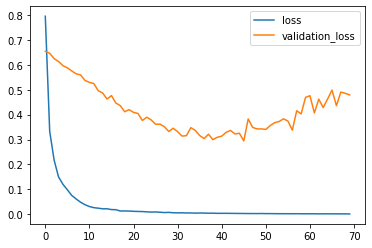

In [64]:
import matplotlib.pyplot as plt
plt.plot(test.history['loss'],label='loss')
plt.plot(test.history['val_loss'],label='validation_loss')
plt.legend()

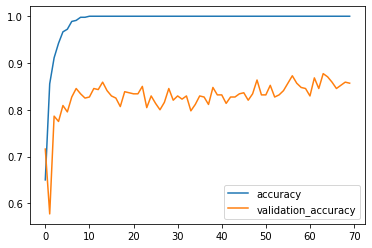

In [65]:
plt.plot(test.history['accuracy'],label='accuracy')
plt.plot(test.history['val_accuracy'],label='validation_accuracy')
plt.legend()

In [66]:
model.save('bee.h5')

In [67]:
print(np.shape(df.iloc[0]['x']))

(64, 64, 3)


In [68]:
def test_image(n):
  img = df.iloc[n]['x']
  img = np.array(img+img)
  return model.predict(img)[0]

In [69]:
def test_image(n):   
  img = df.iloc[n]['x']
  plt.imshow(df.iloc[n]['x'])
  plt.imshow(df.iloc[n]['x'][:, :, ::-1])
  img = np.array([img for i in range(2)])   
  return model.predict(img)[0]

array([1.], dtype=float32)

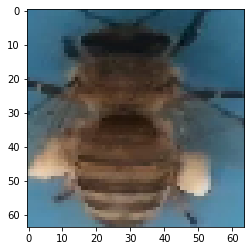

In [70]:
test_image(1)